<font size="4" face="verdana" color="red"> Brainery Byte
<hr></font>
<font size="6" face="verdana" color="blue"> <b>Building an Interactive User Interface <br>in Jupyter Notebook</b> <br>
    >> Building A Shopping List <<
    <br>
<br>
</font><p>

<font size="4" face="verdana" color="black">
 R211014 <br>
 Silvia Mazzoni, 2021 <br>
      silviamazzoni@yahoo.com <br>

<br>
The objective of this workbook is to help you assemble the building blocks of an interactive user interface.<br>
    <p>
    
<font size="4" face="verdana" color="black">
    <b>Widgets:</b>
    <p>Widgets are what makes Jupyter Notebooks so awesome! 
Here is where I get my info on building <a href = "https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html"> WIDGETS </a></p>
    <br>
<ol type="1">
  <li>Text Entry</li>
  <li>Pull-Down Menus</li>
  <li>Radio Buttons</li>
  <li>Checkboxes</li>
  <li>Action Buttons</li>
  <li>Accordion boxes</li>
  <li>Embedded Videos</li>
    <li>Sliders </li>
    <br>

</ol>
</font>
<font size="3" face="verdana" color="black">
   <br>
    <b>NOTES:</b>
    <ol>
        <li> This is where you put notes.</li>
        <ol type="1">
            <li> <a href = "https://www.silviasbrainery.com"> Here is a Hypterlink to my web site</a> with additional text</li>
            <li> <a href = "https://youtu.be/CTqG3GbB0i0"> Here is a hyperlink to a video</a></li>
        </ol>
        <li> Here is another line in the outline </li>
    </ol>
</font>
    
<BR>
    
When you are done, you can write simple text

Because we are working in Binder, and Binder sessions are meant to be ephemeral, it is not possible for you to save any changes you make to your Jupyter Notebook. If you do make changes or notes, you will need to download the notebook to your own computer by clicking File > Download as > Notebook (.ipynb). The only way you will be able to run these is if you have the appropriate software to run Jupyter Notebooks in Python and pip install OpenSeesPy and eSEESminiPy in your Python configuration. You may view my videos on how to install Anaconda, Jupyter Notebooks and OpenSeesPy (https://www.youtube.com/c/silviasbrainery).
    
This Code has been developed by Silvia Mazzoni. Please acknowledge this in your scripts, when applicable

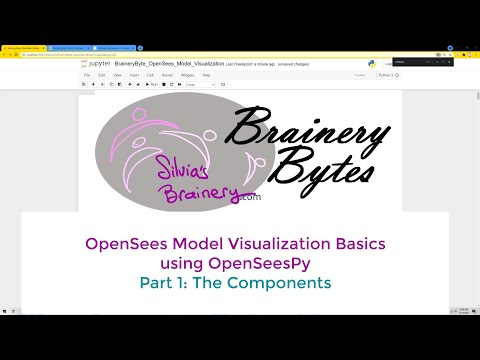

In [1]:
#Here is an example of embedding a video into your Notebook
from IPython.lib.display import YouTubeVideo
YouTubeVideo('8AFhbeVl3qY')

# Initialize Python:

In [2]:
# pip install these packages if you are running this locally
from ipywidgets import widgets, Output
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
from IPython.display import display
from IPython.display import clear_output
from IPython.display import HTML
from IPython.display import Image
from IPython.display import Javascript

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 100000;

<IPython.core.display.Javascript object>

## Initalize Widget Data

In [4]:
AllWidgetData = {}
outBucketData = {}

## Create a header for your UI. put this into a widget so you can display it anywhere

In [5]:
outBucketData['Header'] = Output()
def createHeader():
    label_TopHeader = widgets.HTML(value = """<font color="#D94496"><h1>My Interactive Shopping List</h1></font>
    <p>
    Developed by Silvia Mazzoni<br>
    Let's do some shopping. """)
    thisContainer = widgets.VBox(display='wrap',flex_wrap='wrap',children=[label_TopHeader],border='1px solid blue')
    return thisContainer
    
def displayHeader(thisOut):
    thisContainer = createHeader()
    thisOut.clear_output()
    with thisOut:
        display(thisContainer)
    display(thisOut)
    

# displayHeader(outBucketData['Header'])


# Create nice formatted header, user-input

In [6]:
def makeSectionHeaderWidget(text):
    thisWidget = widgets.HTML(value = """<font color="#D47088"><h3>""" + text + """</h3></font>""")
    return thisWidget

## Create Pull-Down Menu Widget

In [7]:
def makeDropdownMenu(defValue,MenuArray,descrip):
    thisWidget = widgets.Dropdown(
        options=MenuArray,
        value=defValue,
        description=descrip,
        continuous_update=True,
        disabled=False,
    )
    return thisWidget


## Store Data

In [8]:
StoreData = {}
StoreData['Costco'] = {'Address': 'here','Travel Time':10}
StoreData['TraderJoes'] = {'Address': 'there','Travel Time':22}
StoreData['Ralphs'] = {'Address': 'somewhere','Travel Time':5}

## Create Pull-Down Menu for Store

In [9]:
SelectStore_Default = 'Costco'
outBucketData['StoreSelector'] = Output()

def updateStoreData(thisStore):
    AllWidgetData['MyStore'].value='My Store: ' + thisStore
    AllWidgetData['Address'].value='Address: ' + str(StoreData[thisStore]['Address'])
    AllWidgetData['MyStoreTravelTime'].value='Travel Time: ' + str(StoreData[thisStore]['Travel Time'])

    
def SelectStore_eventhandler(change):
    thisStore = change.new
    updateStoreData(thisStore)
    
    
def makeStoreSelector():
    thisSectionHeader = makeSectionHeaderWidget('Store')
    SelectStore_Options = StoreData.keys()
    SelectStore_Descript = 'Select Store'
    AllWidgetData['SelectStore'] = makeDropdownMenu(SelectStore_Default,SelectStore_Options,SelectStore_Descript)
    thisContainer = widgets.VBox(children=[thisSectionHeader,AllWidgetData['SelectStore']])
    AllWidgetData['SelectStore'].observe(SelectStore_eventhandler, names='value')
    
    return thisContainer
  
def displayStoreSelector(thisOut):
    thisContainer = makeStoreSelector()
    thisOut.clear_output()
    with thisOut:
        display(thisContainer)
    display(thisOut)
    
# displayStoreSelector(outBucketData['StoreSelector'])

## Display Store Data

In [10]:
outBucketData['StoreData'] = Output()

def makeStoreData(thisStore):
    thisSectionHeader = makeSectionHeaderWidget('Store Info')
    AllWidgetData['MyStore'] = widgets.Label(value='My Store: ' + thisStore)
    AllWidgetData['Address'] = widgets.Label(value='Address: ' + str(StoreData[thisStore]['Address']))
    AllWidgetData['MyStoreTravelTime'] = widgets.Label(value='Travel Time: ' + str(StoreData[thisStore]['Travel Time']))
    thisContainer = widgets.VBox(children=[thisSectionHeader,AllWidgetData['MyStore'],AllWidgetData['Address'],AllWidgetData['MyStoreTravelTime']])
    return thisContainer

def DisplayStoreData(thisStore,thisOut):
    thisContainer = makeStoreData(thisStore)
    thisOut.clear_output()
    with thisOut:
        display(thisContainer)
    display(thisOut)
    
# DisplayStoreData(SelectStore_Default,outBucketData['StoreData'])

# Shopping Items

In [11]:
ShoppingItems = {'FRUITS':{'Bananas':{'price':10,'default':0},
                           'Apples':{'price':25,'default':1},
                           'Oranges':{'price':33,'default':6}},
                 'CARBS':{'Rice':{'price':37,'default':3},
                          'Pasta':{'price':27,'default':2},
                          'Bread':{'price':15,'default':1}}}

## Create Checkbox

In [12]:
def makeCheckbox(defValue,descrip):
    thisWidget = widgets.Checkbox(
        value=defValue,
        description=descrip,
        disabled=False,
        indent=False
    )
    return thisWidget



## Create Slider for quantity

In [13]:
def makeFloatSlider(defValue,RangeArray,descrip):
    thisSlider = widgets.FloatSlider(
        value=defValue,
        min=RangeArray[0],
        max=RangeArray[2],
        step=RangeArray[1],
        description= descrip,
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True
    )
    return thisSlider

## Select Items and Amount:

In [14]:
outBucketData['ShoppingItems'] = Output()
defValue = False

def makeShoppingItemsDisplay():
    thisSectionHeader = makeSectionHeaderWidget('Shopping Items')
    thisWidgetList_H = []
    for ItemType,ItemData in ShoppingItems.items():
        typeLabelWidget = widgets.Label(value=ItemType)
        thisWidgetList_here = []
        for thisItem,thisItemData in ItemData.items():
            thisPrice = ShoppingItems[ItemType][thisItem]['price']
            thisWidget=makeCheckbox(defValue,thisItem + ' (' + str(thisPrice) + '/unit)')
            thisDefaultAmt = ShoppingItems[ItemType][thisItem]['default']
            thisLabel = '(def=' + str(thisDefaultAmt)+')'
            AmountRange = [0,1,20]
            thisSliderWidget = makeFloatSlider(thisDefaultAmt,AmountRange,thisLabel)
            thisContainer = widgets.HBox(display='wrap',flex_wrap='wrap',children=[thisSliderWidget,thisWidget])
            thisWidgetList_here.append(thisContainer)
            AllWidgetData[thisItem+'CheckBox'] = thisWidget
            AllWidgetData[thisItem+'Amount'] = thisSliderWidget
        thisContainer = widgets.VBox(display='wrap',flex_wrap='wrap',children=[typeLabelWidget,*thisWidgetList_here])
        thisWidgetList_H.append(thisContainer)
    thisHBox = widgets.VBox(display='wrap',flex_wrap='wrap',children=thisWidgetList_H)
    thisContainer=widgets.VBox(display='wrap',flex_wrap='wrap',children=[thisSectionHeader,thisHBox])
    return thisContainer
  

def displayShoppingItemsDisplay(thisOut):
    thisContainer = makeShoppingItemsDisplay()
    thisOut.clear_output()
    with thisOut:
        display(thisContainer)
    display(thisOut)   
    
    
# displayShoppingItemsDisplay(outBucketData['ShoppingItems'])
    

# Create Radio Buttons for Hot Items

In [15]:
HotItems = {'Chicken':{'Whole':10,'Half':7,'None':0},'Ribs':{'FullRack':12,'HalfRack':8,'None':0}}
display(HotItems)


{'Chicken': {'Whole': 10, 'Half': 7, 'None': 0},
 'Ribs': {'FullRack': 12, 'HalfRack': 8, 'None': 0}}

In [16]:
def makeRadioButtons(defValue,MenuArray,descrip):
    thisWidget = widgets.RadioButtons(
        options=MenuArray,
        value=defValue,
    #    layout={'width': 'max-content'}, # If the items' names are long
        description=descrip,
        disabled=False
    )
    return thisWidget


In [17]:
outBucketData['HotItems'] = Output()
PriceWidget = {}

def HotItems_eventhandler(change):
    updateHotItemsDisplay()
    
def updateHotItemsDisplay():
    TotalHotPrice = 0
    for ItemType,ItemData in HotItems.items():
        thisItemValue = AllWidgetData[ItemType].value
        thisItemPrice = HotItems[ItemType][thisItemValue]
        PriceWidget[ItemType].value = ItemType + ' Price: ' + str(thisItemPrice)
        TotalHotPrice = TotalHotPrice + float(thisItemPrice)
    PriceWidget['TotalHotPrice'].value = 'Total HotItems Price: ' + str(TotalHotPrice)
    
def makeHotItemsDisplay():
    thisSectionHeader = makeSectionHeaderWidget('Hot Items')
    thisWidgetList_V = []
    TotalHotPrice = 0
    for ItemType,ItemData in HotItems.items():
        theseOptions = ItemData.keys()
        thisDef = 'None'
        AllWidgetData[ItemType] =makeRadioButtons(thisDef,theseOptions,ItemType)
        PriceWidget[ItemType] = widgets.Label(value=ItemType + ' Price: ' + str(HotItems[ItemType][thisDef]) ,  fontsize=20, color = '#ff0000',border='3 px solid red')
        thisContainer=widgets.HBox(children=[AllWidgetData[ItemType],PriceWidget[ItemType]])
        thisWidgetList_V.append(thisContainer)
        TotalHotPrice = TotalHotPrice + HotItems[ItemType][thisDef]
        AllWidgetData[ItemType].observe(HotItems_eventhandler, names='value')
    PriceWidget['TotalHotPrice'] = widgets.Label(value='Total HotItems Price: ' + str(TotalHotPrice) ,  fontsize=20, color = '#ff0000',border='3 px solid red')
    thisContainer = widgets.VBox(children=[thisSectionHeader,*thisWidgetList_V,PriceWidget['TotalHotPrice']])
    return thisContainer
    
def displayHotItemsDisplay(thisOut):
    thisContainer = makeHotItemsDisplay()
    thisOut.clear_output()
    with thisOut:
        display(thisContainer)
    display(thisOut)
    
# displayHotItemsDisplay(outBucketData['HotItems'])

## Entry Widget for Extras

In [18]:
def makeTextEntryWidget(defValue,descrip,placeholder = ''):
    thisWidget = widgets.Text(
        value=defValue,
        placeholder=placeholder,
        description=descrip,
        #layout=widgets.Layout(width='75%', height='40px'),
        continuous_update=True,
        disabled=False
    )
    return thisWidget

def makeFloatEntryWidget(defValue,descrip,placeholder = ''):
    thisWidget = makeTextEntryWidget(str(defValue),descrip,placeholder)
    return thisWidget


In [19]:
outBucketData['Extras'] = Output()
ExtrasLabelWidget = {}
ExtrasPriceWidget = {}

def makeExtrasDisplay():
    thisSectionHeader = makeSectionHeaderWidget('Extras')
    thisExtraWidgetList = [thisSectionHeader]
    for i in range(5):
        ExtrasLabelWidget[str(i)] = makeTextEntryWidget('','','Enter Item Description')
        ExtrasPriceWidget[str(i)] = makeTextEntryWidget('','','Enter Item Price')
        thisContainer = widgets.HBox(children=[ExtrasLabelWidget[str(i)],ExtrasPriceWidget[str(i)]])
        thisExtraWidgetList.append(thisContainer)
    thisContainer = widgets.VBox(children=thisExtraWidgetList)
    return thisContainer

def dispalyExtrasDisplay(thisOut):
    thisContainer = makeExtrasDisplay()
    thisOut.clear_output()
    with thisOut:
        display(thisContainer)
    display(thisOut)

# dispalyExtrasDisplay(outBucketData['Extras'])


# Display Interactive Shopping List
Put this into a function so you can update it

In [20]:
# outBucketData['ShoppingListOptions'] = Output()


# # update shopping list as user updates input
# def AllChange_eventHadler(change):
#     makeShoppingList(outBucketData['ShoppingList'])


# def makeShoppingListOptions():
#     theseContainers = []
#     theseContainers.append(createHeader())
    
#     theseContainers.append(makeStoreSelector())
# #     theseContainers.append(makeStoreData(SelectStore_Default))
#     theseContainers.append(makeShoppingItemsDisplay())
#     theseContainers.append(makeHotItemsDisplay())
#     theseContainers.append(makeExtrasDisplay())
#     thisContainer = widgets.VBox(children=theseContainers)
#     return thisContainer



# def displayShoppingListOptions(thisOut):
#     thisContainer = makeShoppingListOptions()
#     thisOut.clear_output()
#     with thisOut:
#         display(thisContainer)
#     display(thisOut)
#     for thisWidgetLabel,thisWidget in AllWidgetData.items():
#         thisWidget.observe(AllChange_eventHadler, names='value')
#     for thisKey in ExtrasLabelWidget.keys():
#         ExtrasLabelWidget[thisKey].observe(AllChange_eventHadler, names='value')
#         ExtrasPriceWidget[thisKey].observe(AllChange_eventHadler, names='value')
    
    


In [21]:
outBucketData['ShoppingListOptions'] = Output()

# update shopping list as user updates input
def AllChange_eventHadler(change):
    makeShoppingList(outBucketData['ShoppingList'])

def makeShoppingListOptions():
    theseContainers = []
    theseContainers.append(createHeader())
    
    thisAccordion = widgets.Accordion([makeStoreSelector()])
    thisAccordion.set_title(0, '  Store')
    thisAccordion.selected_index = None
    theseContainers.append(thisAccordion)
    
    thisAccordion = widgets.Accordion([makeShoppingItemsDisplay()])
    thisAccordion.set_title(0, '  Shopping Items')
    thisAccordion.selected_index = None
    theseContainers.append(thisAccordion)
    
    thisAccordion = widgets.Accordion([makeHotItemsDisplay()])
    thisAccordion.set_title(0, '  Hot Items')
    thisAccordion.selected_index = None
    theseContainers.append(thisAccordion)
    
    thisAccordion = widgets.Accordion([makeExtrasDisplay()])
    thisAccordion.set_title(0, '  Extras')
    thisAccordion.selected_index = None
    theseContainers.append(thisAccordion)
    
    thisContainer = widgets.VBox(children=theseContainers)
    return thisContainer

def displayShoppingListOptions(thisOut):
    thisContainer = makeShoppingListOptions()
    thisOut.clear_output()
    with thisOut:
        display(thisContainer)
    display(thisOut)
    for thisWidgetLabel,thisWidget in AllWidgetData.items():
        thisWidget.observe(AllChange_eventHadler, names='value')
    for thisKey in ExtrasLabelWidget.keys():
        ExtrasLabelWidget[thisKey].observe(AllChange_eventHadler, names='value')
        ExtrasPriceWidget[thisKey].observe(AllChange_eventHadler, names='value')


# Make Shopping-List Output

In [22]:
outBucketData['ShoppingList'] = Output()
outLines = []
def makeShoppingList(thisOut):
    thisOut.clear_output()
    global outLines
    outLines = ['Shopping List']
    thisSectionHeader = makeSectionHeaderWidget('Shopping List')
    thisStore = AllWidgetData['SelectStore'].value
    outLines.append('----------------------')
    outLines.append('Store: ' + thisStore)
    outLines.append('Travel Time: ' + str(StoreData[thisStore]['Travel Time']))
    outLines.append('----------------------')
    with thisOut:
        display(thisSectionHeader)
        DisplayStoreData(thisStore,outBucketData['StoreData'])
    TotalCost = 0
    for ItemType,ItemData in ShoppingItems.items():
        for thisItem,thisItemData in ItemData.items():
            thisWidgetValue = AllWidgetData[thisItem+'CheckBox'].value
            if thisWidgetValue:
                thisPrice = ShoppingItems[ItemType][thisItem]['price']
                thisAmount = AllWidgetData[thisItem+'Amount'].value
                TotalItemPrice = float(thisPrice)*float(thisAmount)
                TotalCost = TotalCost + TotalItemPrice
                with thisOut:
                    thisString = str(thisAmount) + ' units of ' + thisItem + ' @' + str(thisPrice) + '/unit =' + str(TotalItemPrice) 
                    outLines.append(thisString)
                    print(thisString)
                
    for ItemType,ItemData in HotItems.items():
        thisItemValue = AllWidgetData[ItemType].value
        if thisItemValue != 'None':
            thisItemPrice = HotItems[ItemType][thisItemValue]
            TotalCost = TotalCost + thisItemPrice
            with thisOut:
                thisString = ItemType + ': ' + thisItemValue + ' @' + str(thisItemPrice)
                outLines.append(thisString)
                print(thisString)
    
    for thisKey in ExtrasLabelWidget.keys():
        thisExtraLabel = ExtrasLabelWidget[thisKey].value
        thisExtraPrice = ExtrasPriceWidget[thisKey].value
        if len(thisExtraLabel)>0:
            if len(thisExtraPrice)>0:
                TotalCost = TotalCost + float(thisExtraPrice)
                with thisOut:
                    thisString = thisExtraLabel + ' @' + str(thisExtraPrice)
                    outLines.append(thisString)
                    print(thisString)
            else:
                with thisOut:
                    thisString = thisExtraLabel
                    outLines.append(thisString)
                    print(thisString)
        
    with thisOut:
        outLines.append('----------------------')
        print('----------------------')
        thisString = 'Shopping-List TOTAL: ' + str(TotalCost)
        outLines.append(thisString)
        print(thisString)
        
        
def DisplayShoppingList(thisOut):
    makeShoppingList(thisOut)
    display(thisOut)
    


## Make a Print Button

In [23]:
def makeButton(text):
    thisWidget = widgets.Button(
        description = text,
        style= {'button_color':'#FCCCEF'}
    )
    return thisWidget
    

In [24]:
outFilename = 'ShoppingList.txt'

def makePrintButton():
    PrintButton = makeButton('Print Shopping List')
    PrintButton.on_click(PrintButton_clicked)      
    display(PrintButton)

def PrintButton_clicked(b):
    with open(outFilename, "w") as outfile:
        outfile.write("\n".join(outLines))
    print('File has been printed')
        

In [25]:
displayShoppingListOptions(outBucketData['ShoppingListOptions'])

Output()

In [26]:
DisplayShoppingList(outBucketData['ShoppingList'])

Output()

In [27]:
makePrintButton()

Button(description='Print Shopping List', style=ButtonStyle(button_color='#FCCCEF'))

In [28]:
pwd

'C:\\Users\\silvi'